In [2]:
# EDA FOR THE DATASET, TEXT AND IMAGES BOTH

In [3]:
pip install pandas pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from PIL import Image
import os

# Define paths
captions_file = r'C:\Users\User\Downloads\Dissertation\Flickr8k_text\Flickr8k.token.txt'
image_folder = r'C:\Users\User\Downloads\Dissertation\Flickr8k_Dataset\Flicker8k_Dataset'

# Function to load captions
def load_captions(captions_file):
    df = pd.read_csv(captions_file, delimiter='\t', header=None, names=['image_id', 'caption'])
    df['image_id'] = df['image_id'].apply(lambda x: x.split('#')[0])  # Remove caption_id if present
    return df

# Function to load an image
def load_image(image_id, image_folder):
    image_path = os.path.join(image_folder, image_id)
    if os.path.exists(image_path):
        return Image.open(image_path)
    else:
        return None

# Load captions
captions_df = load_captions(captions_file)

# Displaying captions and corresponding images
def display_sample_images(captions_df, image_folder, num_samples=5):
    sample_df = captions_df.head(num_samples)
    for _, row in sample_df.iterrows():
        img = load_image(row['image_id'], image_folder)
        if img:
            img.show()
            print(f"Caption: {row['caption']}")
        else:
            print(f"Image {row['image_id']} not found.")

# Display sample images and captions
display_sample_images(captions_df, image_folder)


Caption: A child in a pink dress is climbing up a set of stairs in an entry way .
Caption: A girl going into a wooden building .
Caption: A little girl climbing into a wooden playhouse .
Caption: A little girl climbing the stairs to her playhouse .
Caption: A little girl in a pink dress going into a wooden cabin .


In [5]:
# Print basic information about the captions DataFrame
print(captions_df.info())

# Display the first few rows
print(captions_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40460 entries, 0 to 40459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  40460 non-null  object
 1   caption   40460 non-null  object
dtypes: object(2)
memory usage: 632.3+ KB
None
                    image_id  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


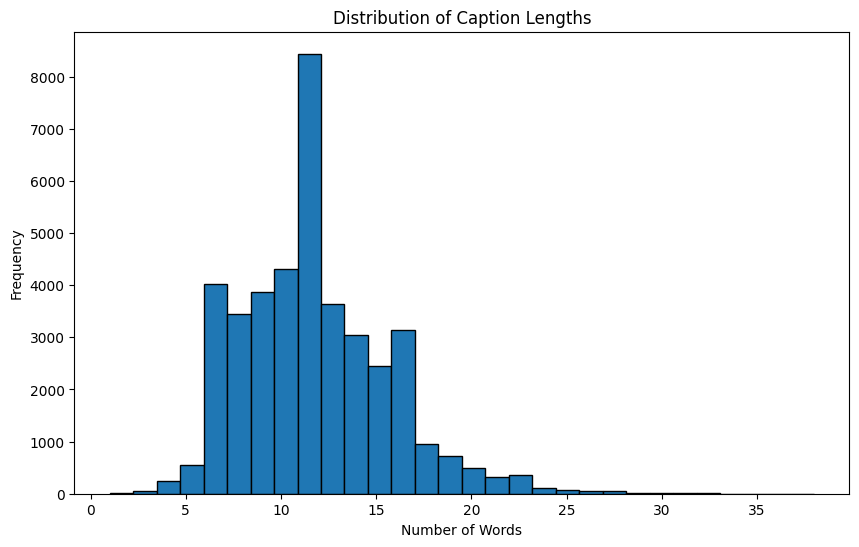

In [6]:
import matplotlib.pyplot as plt

# Compute caption lengths
captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

# Plot the distribution of caption lengths
plt.figure(figsize=(10, 6))
plt.hist(captions_df['caption_length'], bins=30, edgecolor='k')
plt.title('Distribution of Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


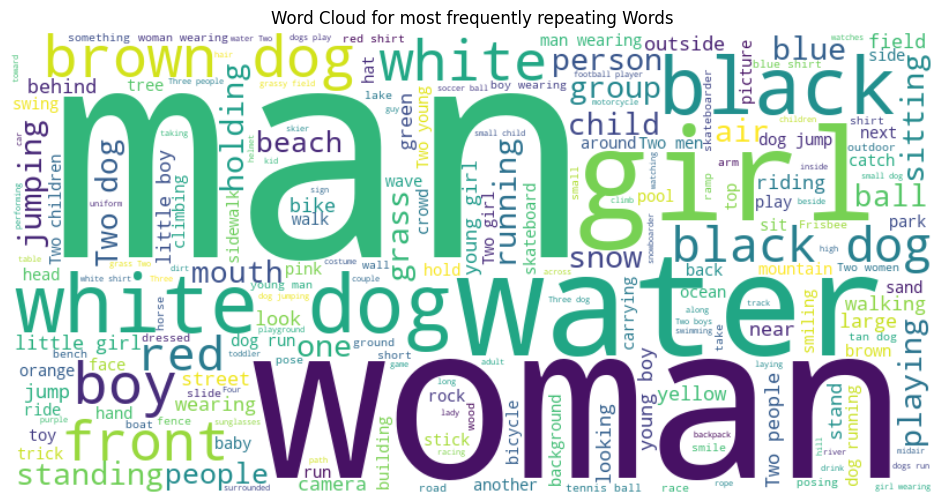

In [8]:
from wordcloud import WordCloud

# Combine all captions into a single string
text = ' '.join(captions_df['caption'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for most frequently repeating Words')
plt.show()


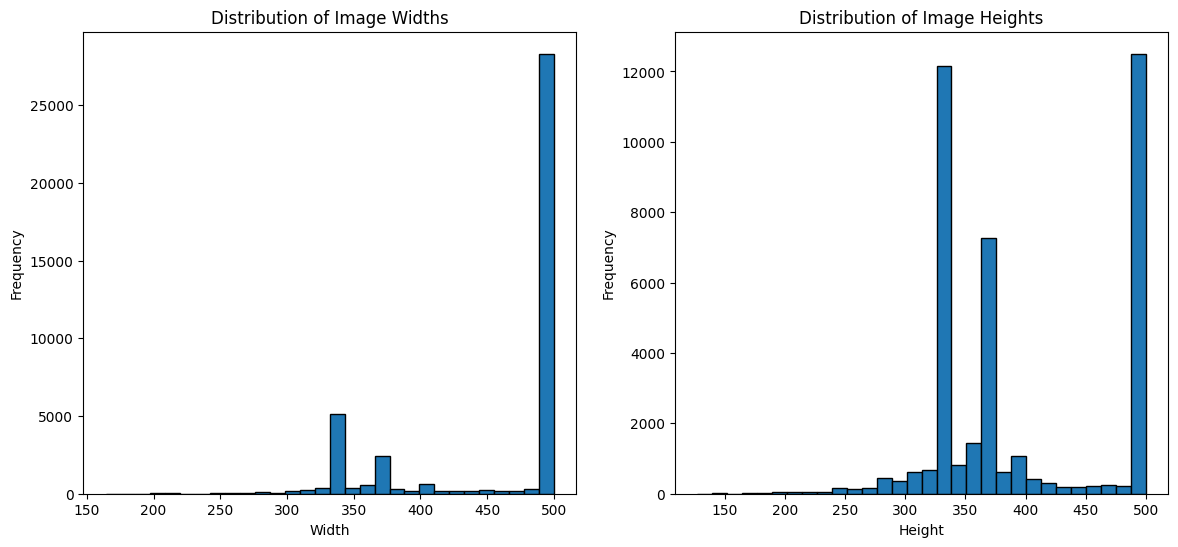

In [9]:
# Analyse image properties

import numpy as np
from PIL import Image

# Function to get image size
def get_image_size(image_id, image_folder):
    image_path = os.path.join(image_folder, image_id)
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            return img.size
    return (None, None)

# Load captions
captions_df = load_captions(captions_file)

# Get image sizes
sizes = [get_image_size(img_id, image_folder) for img_id in captions_df['image_id']]

# Filter out None values
sizes = [size for size in sizes if size != (None, None)]
widths, heights = zip(*sizes)

# Plot distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, edgecolor='k')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, edgecolor='k')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.show()

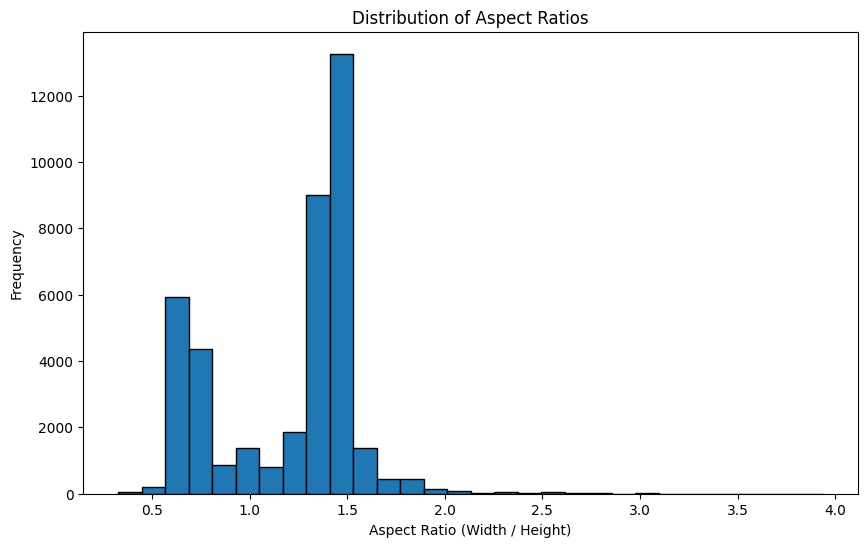

In [10]:
# Calculate aspect ratios
aspect_ratios = np.divide(widths, heights, out=np.zeros_like(widths, dtype=float), where=heights!=0)

# Plot aspect ratio distribution
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=30, edgecolor='k')
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.show()

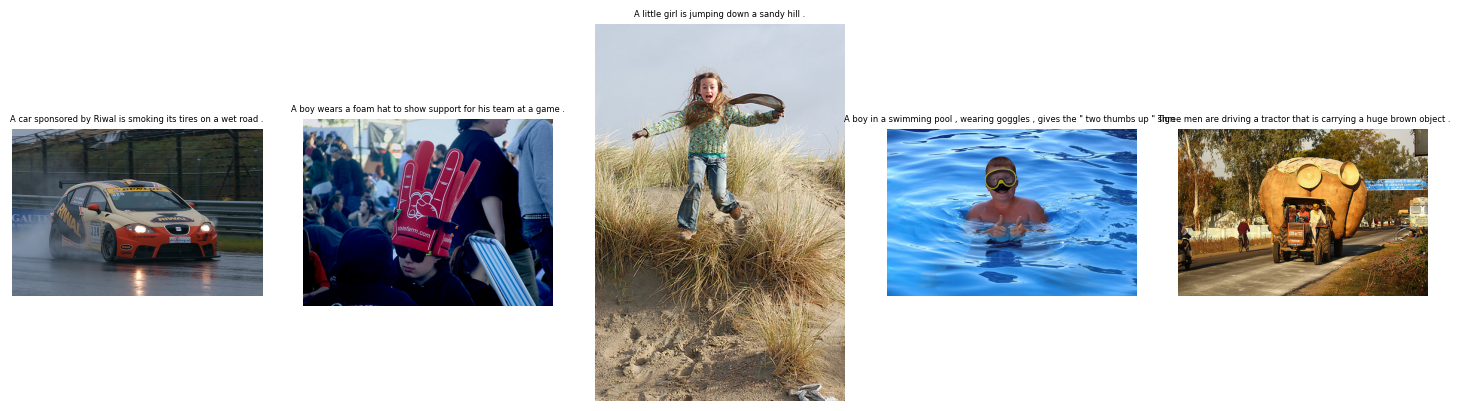

In [11]:
import random

def display_sample_images_with_captions(captions_df, image_folder, num_samples=5):
    sample_df = captions_df.sample(num_samples)
    plt.figure(figsize=(15, 10))
    
    for i, (idx, row) in enumerate(sample_df.iterrows()):
        img = load_image(row['image_id'], image_folder)
        if img:
            plt.subplot(1, num_samples, i+1)
            plt.imshow(img)
            plt.title(row['caption'], fontsize=6)
            plt.axis('off')
            plt.tight_layout(pad=3.0)
    
    plt.show()

# Display sample images and captions
display_sample_images_with_captions(captions_df, image_folder)


In [12]:
# Check for missing images
missing_images = [img_id for img_id in captions_df['image_id'] if not os.path.exists(os.path.join(image_folder, img_id))]
print(f"Number of missing images: {len(missing_images)}")


Number of missing images: 5


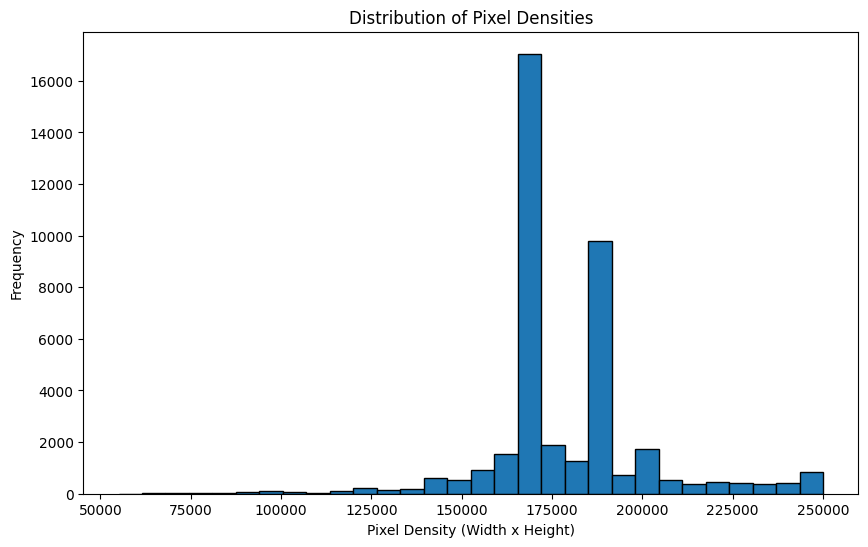

In [13]:
#Pixel density Distribution

# Function to get image size (width, height)
def get_image_size(image_id, image_folder):
    image_path = os.path.join(image_folder, image_id)
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            return img.size
    return (None, None)

# Load captions (assuming captions_df is already loaded)
# captions_df = load_captions(captions_file)  # Uncomment if needed

# Get image sizes
sizes = [get_image_size(img_id, image_folder) for img_id in captions_df['image_id']]

# Filter out None values
sizes = [size for size in sizes if size != (None, None)]
widths, heights = zip(*sizes)

# Calculate pixel densities
pixel_densities = [w * h for w, h in zip(widths, heights)]

# Plot pixel density distribution
plt.figure(figsize=(10, 6))
plt.hist(pixel_densities, bins=30, edgecolor='k')
plt.title('Distribution of Pixel Densities')
plt.xlabel('Pixel Density (Width x Height)')
plt.ylabel('Frequency')
plt.show()

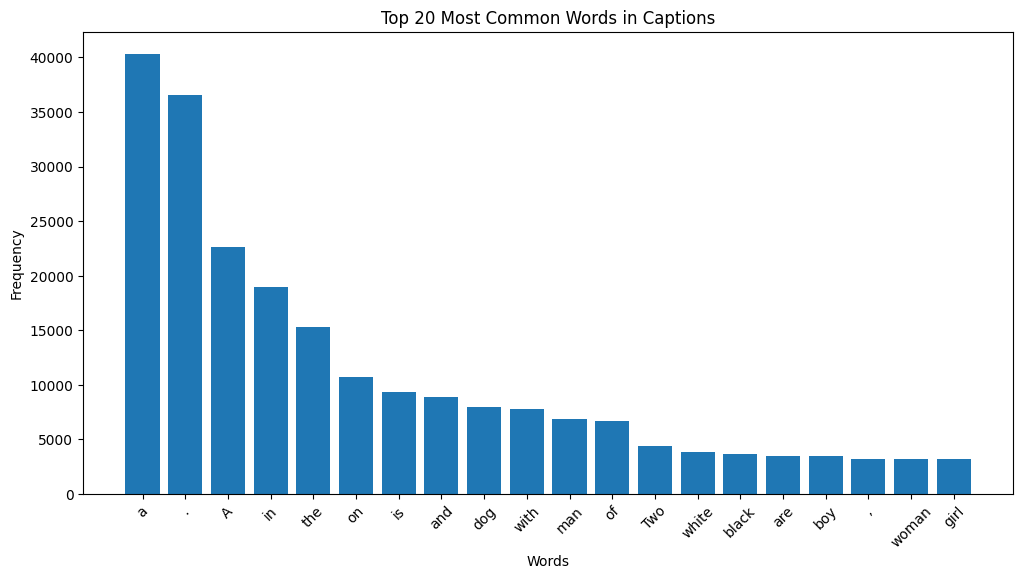

In [14]:
from collections import Counter

# Split captions into individual words
all_words = ' '.join(captions_df['caption']).split()

# Count word frequencies
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Top 20 common words

# Plot word frequency distribution
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


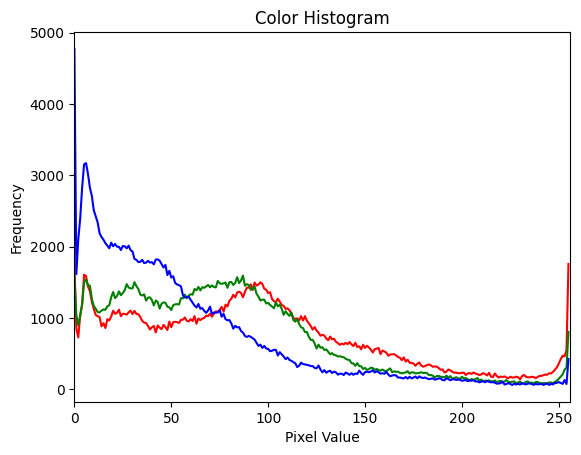

In [15]:
#Image Color Distribution - Analyze the distribution of colors across the dataset. You can plot histograms for each color channel (Red, Green, Blue).

def plot_color_histogram(image):
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        histogram = np.histogram(image[:, :, i], bins=256, range=(0, 256))[0]
        plt.plot(histogram, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Example using a sample image
sample_image = load_image(captions_df['image_id'].iloc[0], image_folder)
if sample_image:
    sample_image_np = np.array(sample_image)
    plot_color_histogram(sample_image_np)


In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


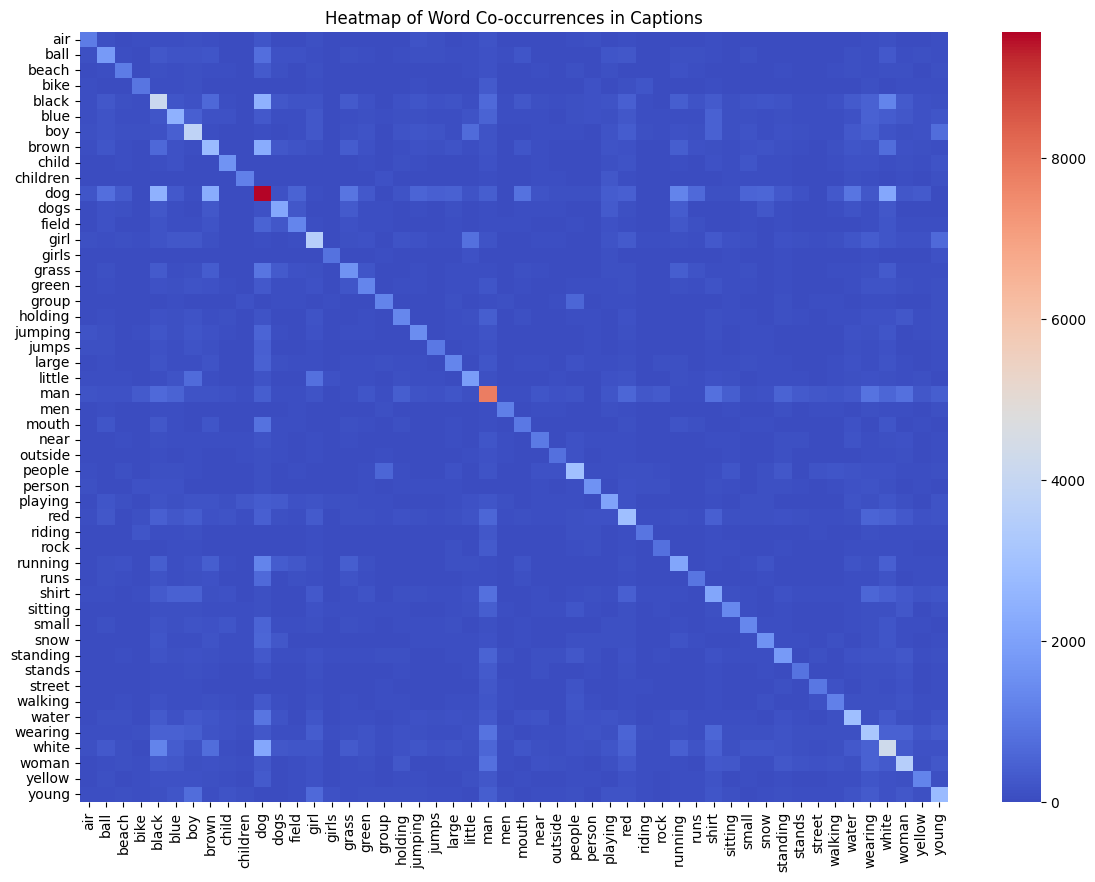

In [18]:
#Heatmap of Word Co-occurrences in Captions - Visualize how frequently pairs of words occur together in captions.

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=50, stop_words='english')
dtm = vectorizer.fit_transform(captions_df['caption'])
dtm_array = dtm.toarray()

# Calculate co-occurrences
co_occurrences = np.dot(dtm_array.T, dtm_array)
words = vectorizer.get_feature_names_out()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(co_occurrences, xticklabels=words, yticklabels=words, cmap='coolwarm')
plt.title('Heatmap of Word Co-occurrences in Captions')
plt.show()


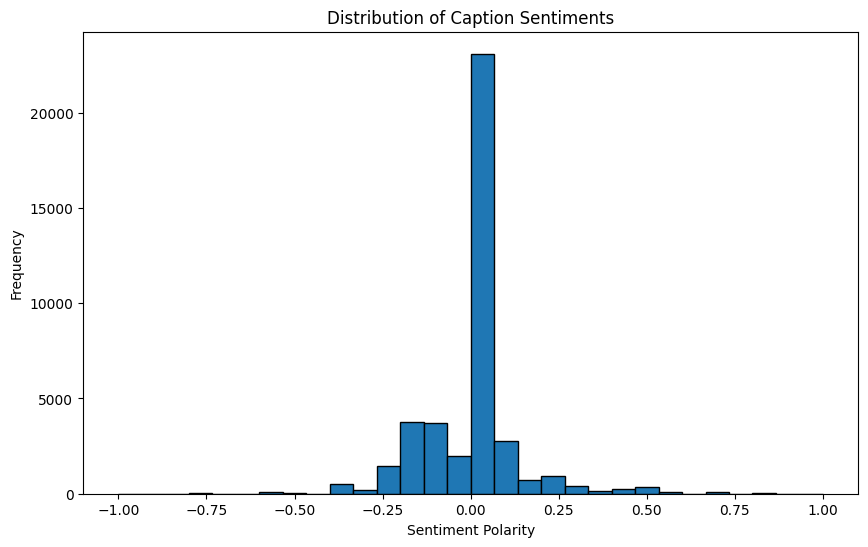

In [19]:
from textblob import TextBlob

# Calculate sentiment polarity
captions_df['sentiment'] = captions_df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(captions_df['sentiment'], bins=30, edgecolor='k')
plt.title('Distribution of Caption Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
